In [ ]:
# limitations
# cable cars not considered

# improvements of existing work
# reservoir economics water
# transporting water the "last mile problem"
# Pricing of the ticket


In [1]:
# the town Hemu in Altay, which is meant to be the principal focus of development.
# Altay Airport, which is infamously small and in the middle of nowhere
# isochrone http://localhost:8889/notebooks/Project%20Altay%20Week%201.ipynb#
from tkinter import *
from tkintermapview import *

# create tkinter window
root = Tk()
root.geometry("800x600")
root.title("project_altay.py")

# create map widget
map_widget = TkinterMapView(root, width=800, height=600, corner_radius=0)
map_widget.place(relx=0.5, rely=0.5, anchor=CENTER)

# set current widget position and zoom
map_widget.set_position(47.7538, 88.0908) # altay airport
map_widget.set_zoom(8)

marker_list=[]
marker_1 = map_widget.set_marker(47.7538, 88.0908, text="Altay Airport")

path_1 = map_widget.set_path([(44,85), (50,85), (50,91), (44,91), (44,85)], name="available area", width=2)

def add_marker_event(coords):
    map_widget.delete_all_marker()
    print("Add marker", coords)
    adr = convert_coordinates_to_address(coords[0], coords[1])
    print(adr.street, adr.housenumber, adr.postal, adr.city, adr.state, adr.country, adr.latlng)
    new_marker = map_widget.set_marker(coords[0], coords[1], text=(str(adr.street), str(adr.city), str(adr.state)))
    marker_list.append([coords[0], coords[1]])

def calculate_distance(coords):
    from geopy.distance import great_circle
    # Loading the lat-long data 
    altay_airport = (47.7538, 88.0908)
    p1 = (coords[0], coords[1])
    print("Distance to Airport: ", round(great_circle(altay_airport, p1).km, 2), " km") # straight line distance
    
map_widget.add_right_click_menu_command(label="Add Marker", command=add_marker_event, pass_coords=True)
map_widget.add_right_click_menu_command(label="Calculate Distance from Airport", command=calculate_distance, pass_coords=True)

def save_vars():
    global width, length, slope_num, depth
    width = entry1.get()
    length = entry2.get()
    slope_num = entry3.get()
    depth = entry4.get()

def calcSnowMaking():
    global width, length, piste_num
    
    # volume of water required to generate snow

    # 云顶 - 总滑雪面积：约85.5万m^2, 41条雪道, 总长70km
    # 万龙 - 总滑雪面积：约70万m^2, 22条雪道, 总长33.6km
    # 北大湖 - 总滑雪面积：约126万m^2, 47条雪道, 总长74km
    
    # Genting ski area: ~855,000 m^2, total length 70 km, avg width 12 m, avg length 1707 m, 41 slopes
    # Wanlongski area: ~700,000 m^2, total length 33.6 km, avg width 21 m, avg length 1527 m, 22 slopes
    # North Great Lake ski area: ~1.26 million m^2, total length 74 km, avg width 17 m, avg length 1574 m, 47 slopes
    
    # see https://en.wikipedia.org/wiki/Snowmaking
    # and https://cosmosmagazine.com/technology/how-does-snow-machine-work/

    # Snowmaking machines generally require between 3,000 and 4,000 cubic meters 
    # of water per hectare of slope covered. 

    # Accordingly, it takes approximately 106 gallons (400 litres) of water to produce 
    # one cubic meter of snow, and snowmaking machines use about 107 gallons (405 litres) 
    # of water per minute.

    # ratio of cubic meter to hectare meter is 1/10000
    # works best when temperature is -4 degrees celcius
    # 1 snow maker covers about 8000 m^2 under ideal circumstances

    # recommended ratio of difficulty (easy:intermediate:advanced) = 1:3:1
    # Print out the variables that were entered
    
    print("Average slope width: " + width)
    print("Average slope length: " + length)
    print("Number of slopes: " + slope_num)
    print("Desired snow depth: " + depth)

    # calculations
    average_area_per_slope = (885000/41 + 700000/22 + 1260000/47) / 3
    
    #hectares_required = int(slope_num) * average_area_per_slope / 10000 # 1 hectare = 10000 square meters
    
    hectares_required = int(width) * int(length) * int(slope_num) / 10000 # 1 hectare = 10000 square meters

    water_required = hectares_required * (float(depth)*3500)    # 3500 for a meter's depth

    minutes_required = water_required*1000/405   # 1L -> 0.001 cubic meter
    snow_per_minute = 405/400 #cubic meters/minute

    snow_required = minutes_required * snow_per_minute #cubic meters
    
    snow_makers_required = hectares_required * 10000 / 8000 # 1 hectare = 10000 square meters
    
    print("Snowboarding Area(ha): ", round(hectares_required, 2), 
          "\nSnow required(cubic meters): ",round(snow_required, -3), 
          "\nWater required(cubic meters): ", round(water_required, -3),
          "\nSnow makers required: ", round(snow_makers_required, 0))
    
def openSnowMaking():
    global entry1, entry2, entry3, entry4
    # Toplevel object which will
    # be treated as a new window
    sm = Toplevel(root)
    # sets the title of the
    # Toplevel widget
    sm.title("Snow Making Requirements")
    # sets the geometry of toplevel
    sm.geometry("400x400")

    # Create the labels and entry boxes for the user to input their variables
    label1 = Label(sm, text="Enter average slope width in m: ").pack()
    entry1 = Entry(sm)
    entry1.pack(pady = 10, padx = 10)

    label2 = Label(sm, text="Enter average slope length in m: ").pack()
    entry2 = Entry(sm)
    entry2.pack(pady = 10, padx = 10)

    label3 = Label(sm, text="Enter the number of slopes: ").pack()
    entry3 = Entry(sm)
    entry3.pack(pady = 10, padx = 10)
    
    label4 = Label(sm, text="Enter the depth of snow in m: ").pack()
    entry4 = Entry(sm)
    entry4.pack(pady = 10, padx = 10)

    # Create the "OK" button and bind it to the save_vars() function
    button2 = Button(sm, text="OK", command=lambda: [save_vars(), calcSnowMaking()]).pack()
    
    # Start the loop to display the window and wait for the user to enter variables
    sm.mainloop()
    
button1 = Button(root, text="Snow Making", command=openSnowMaking).pack()

root.mainloop()

print(marker_list)

Average slope width: 20
Average slope length: 800
Number of slopes: 3
Desired snow depth: .5
Snowboarding Area(ha):  4.8 
Snow required(cubic meters):  21000.0 
Water required(cubic meters):  8000.0 
Snow makers required:  6.0
Average slope width: 12
Average slope length: 1707
Number of slopes: 41
Desired snow depth: .5
Snowboarding Area(ha):  83.98 
Snow required(cubic meters):  367000.0 
Water required(cubic meters):  147000.0 
Snow makers required:  105.0
[]


In [ ]:
# Locations of important tourist attractions ([Aletai, China 2022: Best Places to Visit - Tripadvisor](https://www.tripadvisor.com/Tourism-g1152625-Aletai_Xinjiang_Uygur-Vacations.html)) to bundle with resorts, creating attractive tourist routes

# tripadvisor -> google map
# use google map to get travel time


In [2]:
from tkinter import *
from tkinter import filedialog
from PIL import Image, ImageTk

class ImageCropper:
    def __init__(self, master):
        self.master = master
        self.filename = None
        self.start_x = None
        self.start_y = None
        self.end_x = None
        self.end_y = None
        self.scale = 1.0

        # Create UI elements
        self.canvas = Canvas(master, width=2000, height=500)
        self.canvas.pack(fill=BOTH, expand=YES)
        self.canvas.bind("<ButtonPress-1>", self.on_button_press)
        self.canvas.bind("<B1-Motion>", self.on_button_drag)
        self.canvas.bind("<ButtonRelease-1>", self.on_button_release)
        self.canvas.bind("<MouseWheel>", self.on_mousewheel)
        self.canvas.bind("<Left>", self.move_left)
        self.canvas.bind("<Right>", self.move_right)
        self.canvas.bind("<Up>", self.move_up)
        self.canvas.bind("<Down>", self.move_down)
        self.crop_button = Button(master, text="Crop", command=self.crop_image)
        self.crop_button.pack(pady=5)
        self.export_button = Button(master, text="Export", command=self.export_image)
        self.export_button.pack(pady=5)
        self.coordinates_label = Label(master, text="")
        self.coordinates_label.pack(pady=5)

    def open_image(self):
        self.filename = filedialog.askopenfilename(filetypes=[("TIF files", "*.tif")])
        if self.filename:
            self.image = Image.open(self.filename)
            self.photo = ImageTk.PhotoImage(self.image)
            self.canvas.create_image(0, 0, image=self.photo, anchor=NW)

    def on_button_press(self, event):
        self.start_x = self.canvas.canvasx(event.x)
        self.start_y = self.canvas.canvasy(event.y)

    def on_button_drag(self, event):
        self.end_x = self.canvas.canvasx(event.x)
        self.end_y = self.canvas.canvasy(event.y)
        self.canvas.delete("selection_box")
        self.canvas.create_rectangle(self.start_x, self.start_y, self.end_x, self.end_y, outline="red", tags="selection_box")
        self.show_coordinates()

    def show_coordinates(self):
        self.canvas.delete("coordinates")
        self.canvas.create_text(500,10,fill="darkblue",font="Times 20 italic bold",text="startx: " + str(self.start_x / self.scale) + "starty: " + str(self.start_y / self.scale) + "endx: " + str(self.end_x / self.scale) + "endy: " + str(self.end_y / self.scale), tags="coordinates")
    
    def on_button_release(self, event):
        pass

    def on_mousewheel(self, event):
        scale_factor = 1.1 if event.delta > 0 else 0.9
        self.scale *= scale_factor
        self.canvas.scale(ALL, event.x, event.y, scale_factor, scale_factor)

    def move_left(self, event):
        self.canvas.move(ALL, 10, 0)

    def move_right(self, event):
        self.canvas.move(ALL, -10, 0)

    def move_up(self, event):
        self.canvas.move(ALL, 0, 10)

    def move_down(self, event):
        self.canvas.move(ALL, 0, -10)

    def crop_image(self):
        if self.filename and self.start_x and self.start_y and self.end_x and self.end_y:
            box = (self.start_x / self.scale, self.start_y / self.scale, self.end_x / self.scale, self.end_y / self.scale)
            cropped_image = self.image.crop(box)
            self.cropped_image = cropped_image
            self.cropped_photo = ImageTk.PhotoImage(cropped_image)
            self.canvas.create_image(0, 0, image=self.cropped_photo, anchor=NW)
            self.canvas.delete("selection_box")

    def export_image(self):
        if self.cropped_image:
            filename = filedialog.asksaveasfilename(defaultextension=".tif", filetypes=[("TIF files", "*.tif")])
            if filename:
                self.cropped_image.save(filename)

if __name__ == "__main__":
    root = Tk()
    root.title("Image Cropper")
    app = ImageCropper(root)
    menu_bar = Menu(root)
    file_menu = Menu(menu_bar, tearoff=0)
    file_menu.add_command(label="Open", command=app.open_image)
    file_menu.add_separator()
    file_menu.add_command(label="Exit", command=root.quit)
    menu_bar.add_cascade(label="File", menu=file_menu)
    root.config(menu=menu_bar)
    root.mainloop()


invalid command name "140301893170944update_canvas_tile_images"
    while executing
"140301893170944update_canvas_tile_images"
    ("after" script)


Matplotlib created a temporary config/cache directory at /var/folders/zf/49prmn_s7s5861rytkmr3_080000gn/T/matplotlib-r7uelnbe because the default path (/Users/ribells/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


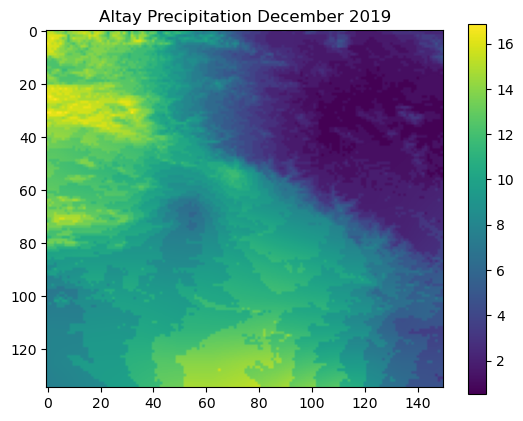

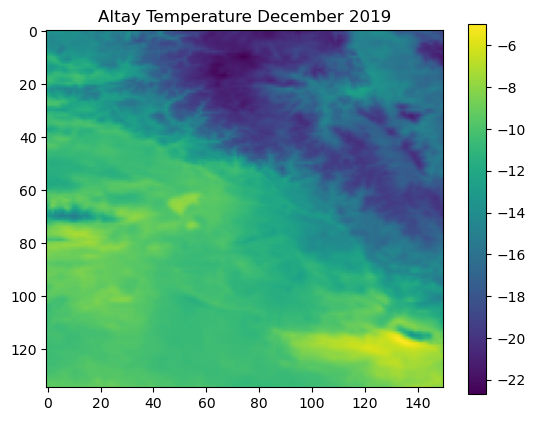

135 150


In [1]:
# High snowfall regions, like Kanas, where apparently snowed on Jul. 20th
# global weather site, maybe specifically Chinese - couldn't find available data
# alternatively, craete snowfall region from precipitation and temperature

# open and edit raster files using gdal

from osgeo import gdal
import numpy as np
import random

band_id = 1   # change to match the band number needed

def tif_to_array(address):

    prec = gdal.Open(address, gdal.GA_ReadOnly)
    GT_input = prec.GetGeoTransform()
    prec_band = prec.GetRasterBand(band_id)
    img_as_array = prec_band.ReadAsArray()
    size1,size2 = img_as_array.shape
    output=np.zeros(shape=(size1,size2))

    for i in range(0,size1):
        for j in range(0,size2):
            output[i,j] = img_as_array[i,j] 
    return output

p_data = tif_to_array('tifs/Altay_prec_2019_12.tif')
t_data = tif_to_array('tifs/Altay_tmax_2019_12.tif')
d_data = [31] # number of days in the months of the data

# ---------------show tif maps-----------------
from matplotlib import pyplot

p = pyplot.imshow(p_data)
pyplot.colorbar(p)
pyplot.title("Altay Precipitation December 2019")
pyplot.show()

t = pyplot.imshow(t_data)
pyplot.colorbar(t)
pyplot.title("Altay Temperature December 2019")
pyplot.show()

print(len(p_data),(len(p_data[0])))
   # do whatever transformation we would need here
   # export array data as .tif for moving back to qgis


In [5]:
import rasterio
from rasterio import Affine

def array_to_tif(in_array, address):
    dst_crs = "EPSG:4326" # Projection per Chinese crs code
    output = np.float32(in_array)

    # GDAL = (c, a, b, f, d, e)
    # affine.Affine(a, b, c,
    #               d, e, f)

    GT_input_transform = Affine(0.041666666666666664, 0.0, 85.125,
                           0.0, -0.041666666666666664, 50.0)

    with rasterio.open(address,'w', driver='GTiff', height=output.shape[0], width=output.shape[1], count=1, 
                       dtype=np.float32, crs=dst_crs, transform=GT_input_transform,) as dest_file:
        dest_file.write(output, 1)
    dest_file.close()


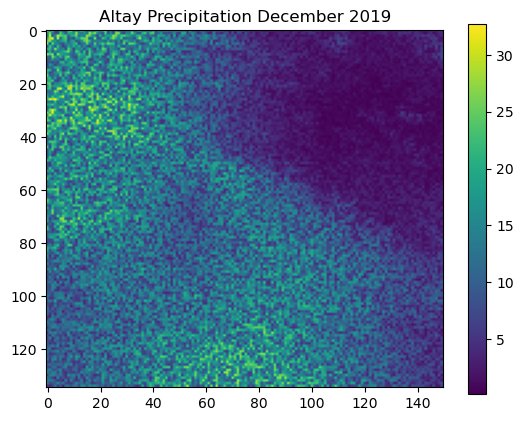

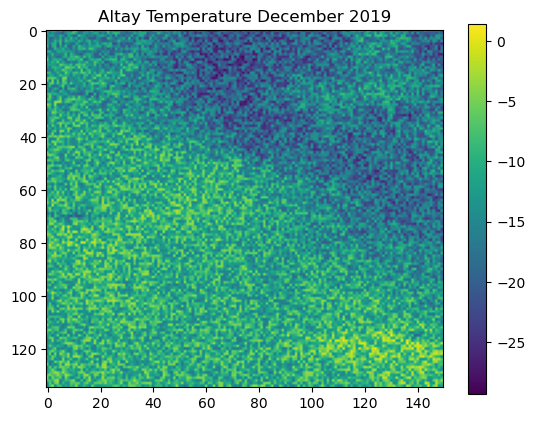

In [8]:
from matplotlib import pyplot
import random

# creating Precip and temp data from the average of the month: p_data -> Precip, t_data -> T_air
P_total = []
T_total = []
SWE_total = []
num_days = 31

# generate the snow data per month
#---------------------------Precipitation------------------------------

Precip = []
if(random.randint(0,100) < 40): # 40% chance of raining on that day
    for j in range(0, len(p_data)):
        Precip.append([])
        for k in range(0,len(p_data[j])):
            Precip[j].append(0)
else:
    for j in range(0, len(p_data)):
        Precip.append([])
        for k in range(0,len(p_data[j])):
            Precip[j].append(p_data[j][k] * (1 + float(random.randint(-60, 100))/100.0))

p = pyplot.imshow(Precip)
pyplot.colorbar(p)
pyplot.title("Altay Precipitation December 2019")
pyplot.show()    
    
#array_to_tif(Precip, 'precipitation.tif')

#------------------------Temperature_max-------------------------------
T_air = []
for j in range(0, len(t_data)):
    T_air.append([])
    for k in range(0,len(t_data[j])):
            T_air[j].append(t_data[j][k] + float(random.randint(-70, 71))/10.0)

#array_to_tif(T_air, 'temperature.tif')

# FIX! Won't work with the D: Project Altay path, 
# maybe need to close the folder in function before proceeding
# CPLE_OpenFailedError: Attempt to create new tiff file 'D:\Elson\Brighton\Application\Project Altay\Week 4\Precip_tif_data	emperature_day_1.tif' failed: No error
            
t = pyplot.imshow(T_air)
pyplot.colorbar(t)
pyplot.title("Altay Temperature December 2019")
pyplot.show() 
    
#------------------------Snow_water_equivalent-------------------------        
SWE = []
for j in range(0, len(t_data)):
    SWE.append([])
    for k in range(0,len(t_data[j])):
        SWE[j].append(0)


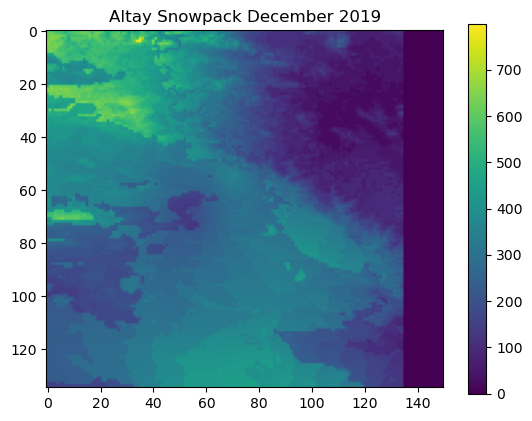

In [9]:
# see: https://www.hec.usace.army.mil/confluence/hmsdocs/hmsguides/modeling-snowmelt/using-the-snowmelt-modeling-capabilities-within-hec-hms

import matplotlib.pyplot as plt

#calculate snowpack based on weather data

#T_air = [0, -2, -2, -5, 0, 0, -12, -14, -8, -7, -10, -2, -3, 0, 1, 5, 4, 2, 8, -1, -2, 4]
#Precip = [0, 2, 12, 6, 0, 0, 12, 14, 28, 27, 10, 2, 3, 0, 11, 5, 4, 12, 8, 1, 2, 4]
#SWE = [50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# dSWE = P - R + V + B, where:

# d = change in
# SWE = Snow Water Equivalent
# P = Precipitation contribution (see rain-to-snow multiplier table below)
# R = Run off (determined by phase change in the snowpack which is determined through the energy balance calculations)
# V = mass gained by water Vapor (can be negative)
# B = mass gained by Blowing snow (can be negative)

# The melt rate for dry conditions typically ranges from 1 to 4 mm/degC-day

rain_to_snow = [
   #Tmin, Tmax, multiplier 
    [1, 40, 0],
    [-2.8, 1, 10],
    [-6.7, -2.8, 15],
    [-9.5, -6.7, 20],
    [-12.2, -9.5, 30],
    [-17.8, -12.2, 40],
    [-28.9, -17.8, 50],
    [-60, -28.9, 100]]

for j in range(0, len(p_data)):
    for k in range(0, len(p_data)):  
        for r in range(0, len(rain_to_snow)):
            if (t_data[j][k] >= rain_to_snow[r][0]):
                if (t_data[j][k] < rain_to_snow[r][1]):
                    P = p_data[j][k]*rain_to_snow[r][2]              
    
        R = 0
        if t_data[j][k] > 0:
            if P == 0:
                R = t_data[j][k] * 0.15748
            else:
                R = t_data[j][k] * 200 # tweekable data to match groundtruth
        else:
            R = 0.5
        if SWE[j][k] + P - R <= 0: # since there cannot be negative snow
            SWE[j][k] = 0
        else:
            SWE[j][k] = SWE[j][k] + P - R

#plot the snow water equivalent
s = plt.imshow(SWE)
plt.colorbar(s)
plt.title("Altay Snowpack December 2019")

plt.show()

In [16]:
# Assume slope is located at 100, 20 and SWE is in millimeters

print(SWE[20][20]/100)

# if we want snow to cover slope to at least .5 meters, we'll need to produce snow if SWE is < .5 there

# we want a snowpack analysis like we did for a season in week3's elson-geo-workbook-version-3.ipynb
# whereby we can figure out how much snow we'd need to make to keep the snowpack at .5 meter or greater

# we can use https://open-meteo.com/en/docs/historical-weather-api#latitude=47.7538&longitude=88.0908&start_date=2022-09-01&end_date=2023-04-30&hourly=temperature_2m,snowfall
# to get the data we want (see altay_weather.csv)

4.210079593658447


In [ ]:
# Use a map for dynamic identification of where snowmaking is being considered

marker_y = int(135 - (marker_list[0][0] - 44) / 6 * 135) - 1
marker_x = int((marker_list[0][1] - 85) / 6 * 150) - 1

print(SWE[marker_x][marker_y])

In [11]:
# volume of water required to generate snow

# see https://en.wikipedia.org/wiki/Snowmaking
# and https://cosmosmagazine.com/technology/how-does-snow-machine-work/

# Snowmaking machines generally require between 3,000 and 4,000 cubic meters 
# of water per hectare of slope covered. 

# Accordingly, it takes approximately 106 gallons (400 litres) of water to produce 
# one cubic meter of snow, and snowmaking machines use about 107 gallons (405 litres) 
# of water per minute.

# ratio of cubic meter to hectare meter is 1/10000

# inputs
import tkinter as tk

# Create the main window
root = tk.Tk()

# Define the function that will be called when the user clicks the "OK" button
def save_vars():
    global width, length
    width = entry1.get()
    length = entry2.get()
    root.destroy()

# Create the labels and entry boxes for the user to input their variables
label1 = tk.Label(root, text="Enter slope width in m:")
label1.pack(side = LEFT)
entry1 = tk.Entry(root)
entry1.pack(side = RIGHT)

label2 = tk.Label(root, text="Enter slope length in m:")
label2.pack()
entry2 = tk.Entry(root)
entry2.pack()

# Create the "OK" button and bind it to the save_vars() function
button = tk.Button(root, text="OK", command=save_vars)
button.pack()
 
# Start the main loop to display the window and wait for the user to enter variables
root.mainloop()

# Print out the variables that were entered
print("Slope width: " + width)
print("Slope length: " + length)

# calculations
hectares_required = len(width) * len(length) / 10000 # 1 hectare = 10000 squr meters

water_required = hectares_required * 3500 #to a meter's depth

minutes_required = water_required*1000/405
snow_per_minute = 405/400 #cubic meters/minute

snow_required = minutes_required * snow_per_minute #cubic meters

print("Hectares covered(ha): ", hectares_required, "Snow required(cubic meters)", snow_required, "Water required(cubic meters)", water_required)

Slope width: 1707
Slope length: 20
Hectares covered(ha):  0.0008 Snow required(cubic meters) 7.000000000000001 Water required(cubic meters) 2.8000000000000003


In [ ]:
for j in range(0, len(SWE_total[i])):
    for k in range(0, len(SWE_total[i][j])):
        if SWE_total[0][j][k] < 0:
            print(SWE_total[0][j][k], j, k)

In [ ]:
# Mountainous regions, Keketuo Hai

# countour lines

# categorize heights of mountains into groups using grid like last project


In [ ]:
c = [["a"]]*3

a = []
for i in range (len(c)):
    for k in range (len(c[i])):
        a.append([])
        a[i].append('a')

        print(a)


In [ ]:
import os
print(os.path.abspath('.'))

In [ ]:
from tkinter import *
from PIL import Image, ImageTk

root = Tk(className = "Project Altay")
root.geometry("800x800")
Grid.rowconfigure(root,0,weight=1)
Grid.columnconfigure(root,0,weight=1)

Grid.rowconfigure(root,1,weight=1)
button1 = Button(root, text="start")
title = Label(root, text="Project Altay", font=("Impact", 64))

title.grid(row=0,column=0,sticky="NSEW")
button1.grid(row=1, column=0, sticky="NSEW")

root.mainloop()